# import data in...

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline 

data = pd.read_csv('data/face_training.csv')
print 'data loaded'

/home/greg/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


data loaded


# Convert the csv data into a tensor with shape of: [images_count, image_size]

In [24]:
# misc variables and sizes of data
images_count = data.iloc[0:,30:].shape[0]  # images_count = 7049
image_strings = data.iloc[0:,30:].values
image_array_size = len(image_strings[0,0].split(' ')) # image_array_size = 9216
desired_locations_count = 30
image_width = image_height = int(np.sqrt(image_array_size)) # image height/width = 96.0


batch_size = 50

images = []

for i in range(0,batch_size):
    image = (image_strings[i,0].split(' '))
    image = map(float, image)
    images.append(image) # => (50, 9216)

tf_images = tf.convert_to_tensor(images, dtype=tf.float32)
print tf_images.get_shape()

np_images = np.asarray(images)
print np_images.shape # => (50, 9216)

(50, 9216)
(50, 9216)


/home/greg/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


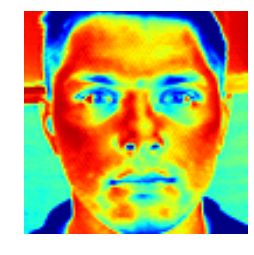

In [23]:
def display(img):
    sq = np.sqrt(img.shape)
    one_image = img.reshape(sq, sq)
    plt.axis('off')
    plt.imshow(one_image) #, cmap='Greys', clim = (-1.0,1.0))
    plt.show()
    
imag = np_images[3,:]
display(imag)

# set up our CNN methods

In [11]:
# set up our weights (or kernals?) and biases for each pixel
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(.1, shape=shape, dtype=tf.float32)
    return tf.Variable(initial)

# convolution
def conv2d(x, W):
    return tf.nn.conv2d(x, W, [1,1,1,1], 'SAME')

# pooling
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# placeholder variables
# images
x = tf.placeholder(tf.float32, shape=[None, image_array_size])
# labels
y_ = tf.placeholder(tf.float32, shape=[None, desired_locations_count])

print 'methods defined'

methods defined


# build Conv Layer 1

In [29]:
# first convolutional layer
W_conv1 = weight_variable([15, 15, 1, 32])
b_conv1 = bias_variable([32])

# turn shape(images_count,9216)  into   (?,96,96,1) ... so it will work with the conv2d method
image = tf.reshape(x, [-1,image_width , image_height,1])
# print (image.get_shape()) # =>(?,96,96,1)

h_conv1 = tf.nn.relu(conv2d(image, W_conv1) + b_conv1)
# print (h_conv1.get_shape()) # => (?, 96, 96, 32)

h_pool1 = max_pool_2x2(h_conv1)
# print (h_pool1.get_shape()) # => (?, 48, 48, 32)

(?, 96, 96, 32)


# build Conv Layer 2

In [30]:
# second convolutional layer
W_conv2 = weight_variable([15, 15, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
# print (h_conv2.get_shape()) # => (?, 48,48, 64)
h_pool2 = max_pool_2x2(h_conv2)
# print (h_pool2.get_shape()) # => (?, 24, 24, 64)


(?, 48, 48, 64)
(?, 24, 24, 64)


# build FC Layer

In [32]:
# densely connected layer
W_fc1 = weight_variable([24 * 24 * 64, 1024])
b_fc1 = bias_variable([1024])

# (?, 24, 24, 64) => (?, 36864)
h_pool2_flat = tf.reshape(h_pool2, [-1, 24*24*64])
# print h_pool2_flat.get_shape() = (?, 36864)

h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
# print (h_fc1.get_shape()) # => (?, 1024)


(?, 1024)


# build a readout layer with the shape of [fc_layer_inputs, desired_locations_count]

In [34]:
# readout layer
W_fc2 = weight_variable([1024, desired_locations_count])
b_fc2 = bias_variable([desired_locations_count])

y_conv=tf.nn.softmax(tf.matmul(h_fc1, W_fc2) + b_fc2)
# print y_conv.get_shape() => (?, 30)


(?, 30)
